In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

The number: 5


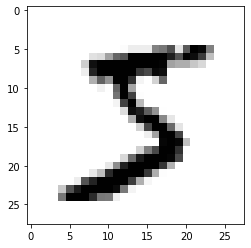

In [4]:
print("The number: "+str(y_train[0]))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.1169 - accuracy: 0.9636
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0396 - accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0273 - accuracy: 0.9911
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0192 - accuracy: 0.9936
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0149 - accuracy: 0.9953
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0107 - accuracy: 0.9968
Epoch 7/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0094 - accuracy: 0.9970
Epoch 8/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0078 - accuracy: 0.9974
Epoch 9/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0069 - accuracy: 0.9975
Epoch 10/10
60

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

In [16]:
score

[0.04647703926132691, 0.9891]

In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04647703926132691
Test accuracy: 0.9891


In [18]:
pred = model.predict(x_test)

In [19]:
print("Actual: ", y_test[0])
print("Predict: ", np.argmax(pred[0]))

Actual:  7
Predict:  7


In [20]:
x_test = x_test.reshape(x_test.shape[0], 28, 28)

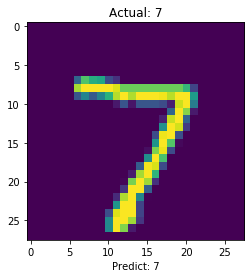

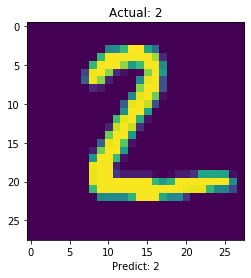

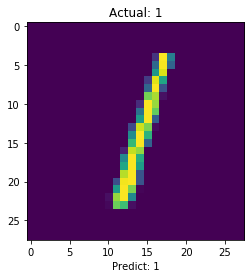

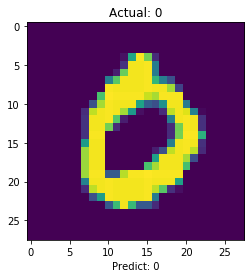

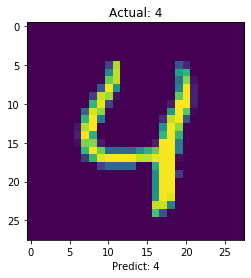

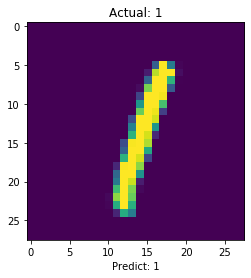

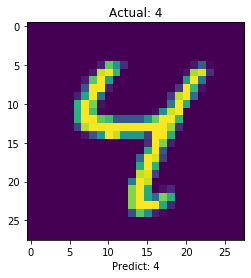

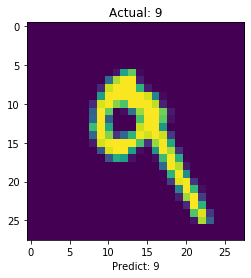

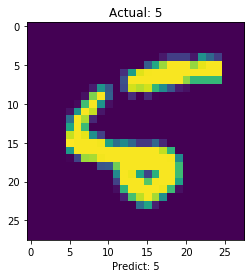

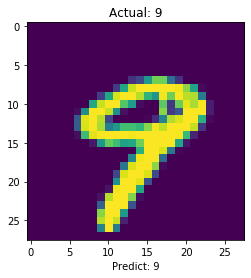

In [21]:
for i in range(10):
    plt.imshow(x_test[i])
    plt.title("Actual: "+str(y_test[i]))
    plt.xlabel("Predict: "+str(np.argmax(pred[i])))
    plt.show()

In [25]:
model.save('model.h5')